In [ ]:
!pip install labml

In [ ]:
%cd /content/drive/MyDrive/project/Super_resolution/src
!python main.py

/content/drive/MyDrive/project/Super_resolution/src
Fold 1
Epoch: 1. Loss: 1897.06726: 100% 90/90 [02:02<00:00,  1.36s/it]
loss in validation: 1653.04478
Epoch: 2. Loss: 1503.64307: 100% 90/90 [02:02<00:00,  1.36s/it]
loss in validation: 1748.92776
Epoch: 3. Loss: 2094.72021: 100% 90/90 [02:02<00:00,  1.36s/it]
loss in validation: 1787.76003
Epoch: 4. Loss: 22122237952.00000:  83% 75/90 [01:43<00:20,  1.38s/it]
Traceback (most recent call last):
  File "main.py", line 13, in <module>
    checkpoint_last,checkpoint_best=train(net,train_data,val_data)
  File "/content/drive/MyDrive/project/Super_resolution/src/process.py", line 50, in train
    loss.backward()
  File "/usr/local/lib/python3.7/dist-packages/torch/_tensor.py", line 255, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph, inputs=inputs)
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py", line 149, in backward
    allow_unreachable=True, accumulate_grad=True)  # allow_u

In [1]:
%cd /content/drive/MyDrive/project/Super_resolution/src
from model import HAN
import torchvision,os,config,torch,cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

net = HAN().cuda()
checkpoint = torch.load("/content/drive/MyDrive/project/Super_resolution/runs/HAN_BIX8.pt")


/content/drive/MyDrive/project/Super_resolution/src


In [2]:
net.load_state_dict(checkpoint)

In [72]:
import numpy as np
import random
SIZE = 48
def random_crop(LR,HR):
    
    x = random.choice(np.arange(0,LR.shape[1]//2))
    y = random.choice(np.arange(0,LR.shape[2]//2))
    rect = torch.tensor([x,y,config.SIZE,config.SIZE])
    rect2 = rect*8
    print(rect,rect2)
    LR = torchvision.transforms.functional.crop(LR,*rect)
    HR = torchvision.transforms.functional.crop(HR,*rect2)
    
    return LR,HR
def predict(LR_path,HR_path,net):
    """
    LR,HR: img type cv2.YCR_CB
    
    """
    LR = cv2.imread(LR_path)  
    HR = cv2.imread(HR_path) 
    LR = cv2.cvtColor(LR, cv2.COLOR_BGR2YCrCb) 
    transforms_head = torchvision.transforms.ToTensor()
    LR= transforms_head(LR.astype(np.float32))
    HR= transforms_head(HR.astype(np.float32))
    LR,HR = random_crop(LR,HR)
    LR= LR.cuda().unsqueeze(0)
    HR_predict = net(LR)
    
    return HR_predict,HR,LR
def predict1(LR_path,net):
    """
    LR,HR: img type cv2.YCR_CB
    
    """
    LR = cv2.imread(LR_path)  
    LR = cv2.cvtColor(LR, cv2.COLOR_BGR2YCrCb) 
    LR = cv2.resize(LR,(64,64))
    transforms_head = torchvision.transforms.ToTensor()
    LR= transforms_head(LR.astype(np.float32))
    LR= LR.cuda().unsqueeze(0)
    HR_predict = net(LR)
    return LR,HR_predict

In [66]:
LR_path = "/content/drive/MyDrive/project/Super_resolution/data/x8/DIV2K_train_LR_x8/0001x8.png"
HR_path = "/content/drive/MyDrive/project/Super_resolution/data/DIV2K_train_HR/DIV2K_train_HR/0001.png"
HR_pred,HR,LR = predict(LR_path,HR_path,net)

tensor([ 0,  6, 48, 48]) tensor([  0,  48, 384, 384])


In [67]:
img_pred = HR_pred.squeeze(0).permute(1,2,0).cpu().detach().numpy()
img_pred = img_pred.astype(np.uint8)
img_pred = cv2.cvtColor(img_pred,cv2.COLOR_YCrCb2RGB)

In [68]:
kernel = np.array([[-1,-1,-1], 
                       [-1, 9,-1],
                       [-1,-1,-1]])
img_pred = cv2.filter2D(img_pred, -1, kernel)

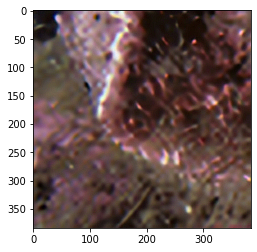

In [69]:
plt.imshow(img_pred)

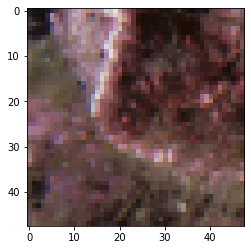

In [70]:
LR =LR.squeeze(0).permute(1,2,0).cpu().numpy()
LR = LR.astype(np.uint8)
LR = cv2.cvtColor(LR,cv2.COLOR_YCrCb2RGB)
plt.imshow(LR)

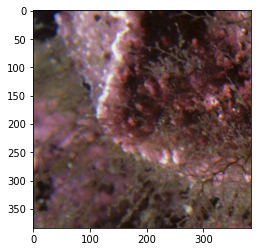

In [71]:
HR = HR.permute(1,2,0).cpu().numpy().astype(np.uint8)
HR = cv2.cvtColor(HR,cv2.COLOR_BGR2RGB)
plt.imshow(HR)

In [83]:
LR_path = "/content/drive/MyDrive/project/Super_resolution/Untitled.png"
LR,HR_predict = predict1(LR_path,net)

In [84]:
img_pred = HR_predict.squeeze(0).permute(1,2,0).cpu().detach().numpy()
img_pred = img_pred.astype(np.uint8)
img_pred = cv2.cvtColor(img_pred,cv2.COLOR_YCrCb2RGB)

In [85]:
kernel = np.array([[-1,-1,-1], 
                       [-1, 9,-1],
                       [-1,-1,-1]])
img_pred = cv2.filter2D(img_pred, -1, kernel)

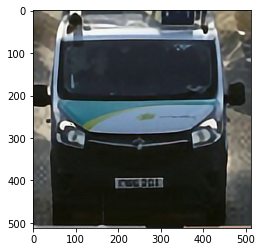

In [86]:
plt.imshow(img_pred)

In [90]:
img_pred = cv2.cvtColor(img_pred,cv2.COLOR_RGB2BGR)
cv2.imwrite("img.png",img_pred)

True